In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head(20)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [40]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#Objective: Understand the relationship between product categories and their best-seller status.
#1.Crosstab Analysis:
#Create a crosstab between the product category and the isBestSeller status.
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [41]:
#.Are there categories where being a best-seller is more prevalent?
#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.
# Normalize by row total
sorted_crosstab=crosstab.copy()
sorted_crosstab['best_seller_proportion'] = crosstab[True] / (crosstab[False] + crosstab[True])

# Sort in descending order
sorted_crosstab = sorted_crosstab.sort_values(by='best_seller_proportion', ascending=False)
print(sorted_crosstab[['best_seller_proportion']])

isBestSeller                      best_seller_proportion
category                                                
Grocery                                         0.058135
Smart Home Security & Lighting                  0.057692
Health & Personal Care                          0.057686
Mobile Phone Accessories                        0.042471
Power & Hand Tools                              0.035339
...                                                  ...
CD, Disc & Tape Players                         0.000000
General Music-Making Accessories                0.000000
Snowboard Boots                                 0.000000
Boxes & Organisers                              0.000000
eBook Readers & Accessories                     0.000000

[296 rows x 1 columns]


In [42]:
#2.Statistical Tests:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
chi2_statistic, chi2_p_value
#The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low ( p )-value, we reject the null hypothesis. 
#This implies that there's a significant association between category and isBestSeller in the dataset.


(36540.20270061387, 0.0)

In [43]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.
association(crosstab, method="cramer")
#The Cramér's V value of 0.122 suggests a weak association between the two variables. Though statistically significant, the strength of this relationship is not very strong in practical terms.

0.1222829439760564

<Figure size 1200x600 with 0 Axes>

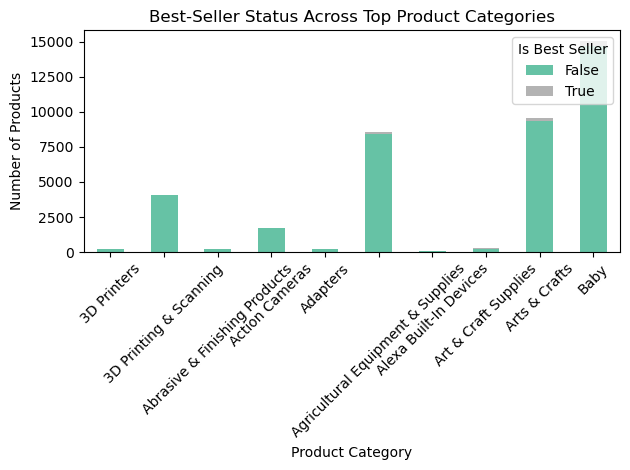

In [44]:
#3.Visualizations:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
top_crosstab = crosstab.head(10)

plt.figure(figsize=(12, 6))  
top_crosstab.plot(kind='bar', stacked=True, colormap='Set2')

plt.title("Best-Seller Status Across Top Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Is Best Seller", loc="upper right")

plt.show()

In [45]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#Objective: Investigate how different product categories influence product prices.
#Preliminary Step: Remove outliers in product prices.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

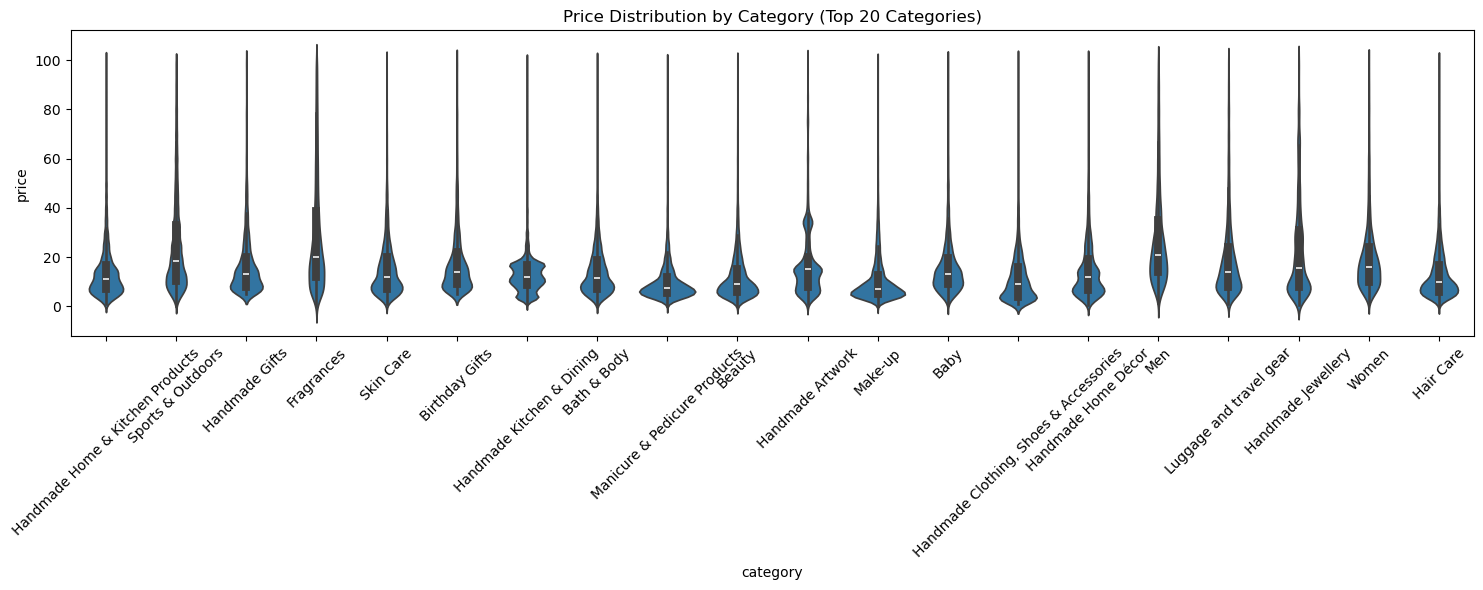

Category with Highest Median Price: Desktop PCs
category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64


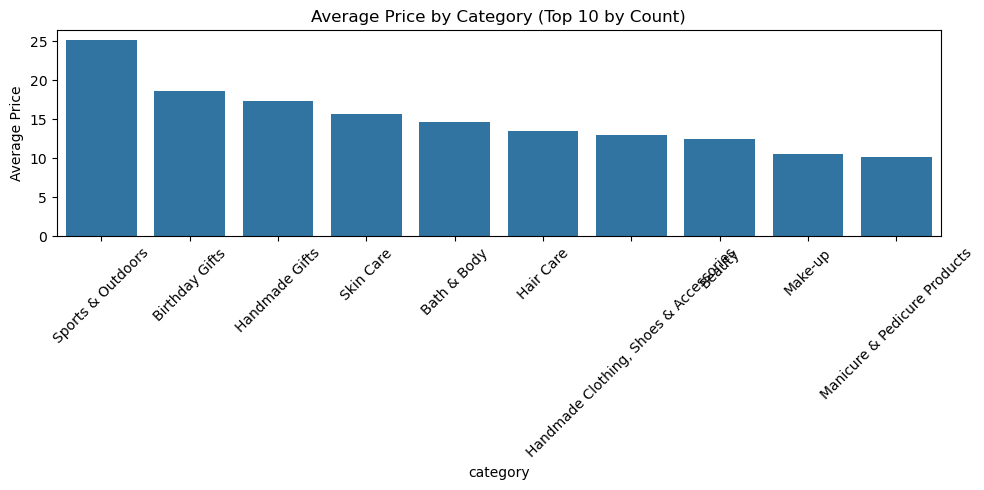

Category with Highest Average Price: Motherboards
category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64


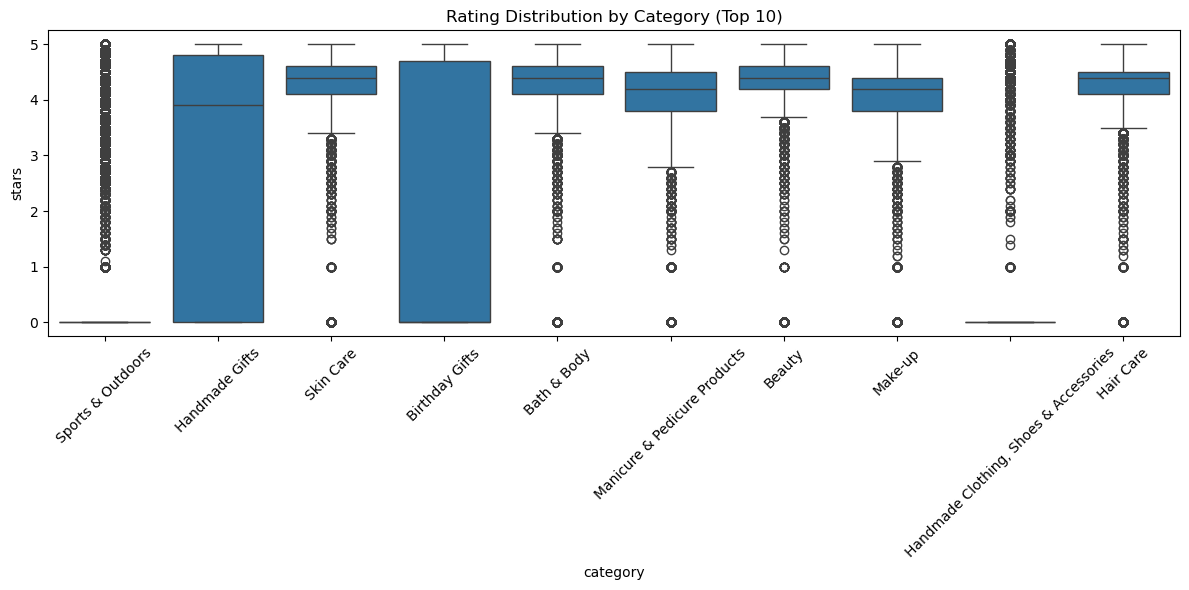

Category with Highest Median Rating: Luxury Food & Drink
category
Luxury Food & Drink       4.544140
Grocery                   4.469414
Laptop Accessories        4.449600
Health & Personal Care    4.439549
Arts & Crafts             4.432942
Name: stars, dtype: float64


In [47]:
#1Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
# Top 20 categories by count
top20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top20_categories)]

plt.figure(figsize=(15, 6))
sns.violinplot(data=df_top20, x='category', y='price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Category (Top 20 Categories)')
plt.tight_layout()
plt.show()

#Which product category tends to have the highest median price? Don't filter here by top categories.
# Median price by category (no filtering)
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
print("Category with Highest Median Price:", median_prices.idxmax())
print(median_prices.head())

#2.Bar Charts:

#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

# Top 10 categories by count
top10 = df_no_outliers['category'].value_counts().head(10).index
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top10)]

# Average prices
avg_prices = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_prices.index, y=avg_prices.values)
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.title('Average Price by Category (Top 10 by Count)')
plt.tight_layout()
plt.show()

#Which product category commands the highest average price? Don't filter here by top categories.
average_prices_all = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
print("Category with Highest Average Price:", average_prices_all.idxmax())
print(average_prices_all.head())
#3.Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Top 10 categories by count for ratings
top10_rating_categories = df_no_outliers['category'].value_counts().head(10).index
df_ratings = df_no_outliers[df_no_outliers['category'].isin(top10_rating_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ratings, x='category', y='stars')
plt.xticks(rotation=45)
plt.title('Rating Distribution by Category (Top 10)')
plt.tight_layout()
plt.show()

#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
median_rating_all = df_no_outliers.groupby('category')['stars'].mean().sort_values(ascending=False)
print("Category with Highest Median Rating:", median_rating_all.idxmax())
print(median_rating_all.head())

-0.12490673262159059


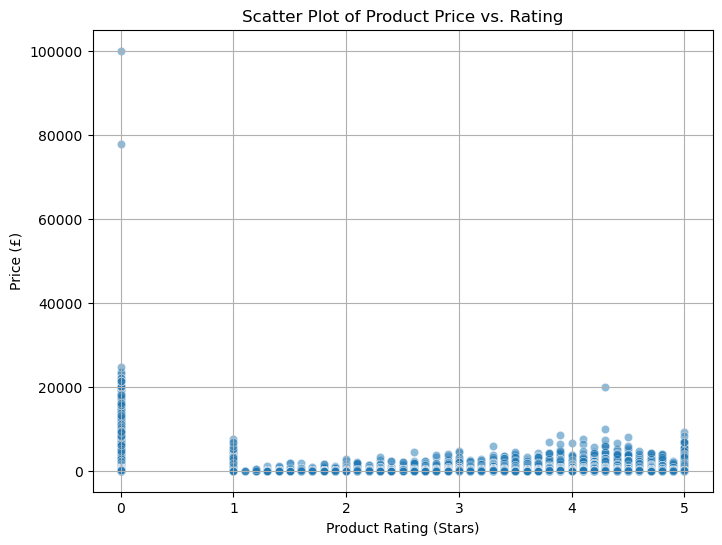

In [54]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#Objective: Analyze how product ratings (stars) correlate with product prices.

#1.Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
correlation = df['price'].corr(df['stars'])
print(correlation)
#Is there a significant correlation between product price and its rating?
#This is a weak negative correlation, very close to zero.
#There is no meaningful linear relationship between a product’s price and its rating (stars).
#Slightly negative means that as price increases, rating might slightly decrease — but this trend is not strong or reliable.
#2.Visualizations:
#Use a scatter plot to visualize the relationship between product rating and price.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='stars', y='price', alpha=0.5)
plt.title("Scatter Plot of Product Price vs. Rating")
plt.xlabel("Product Rating (Stars)")
plt.ylabel("Price (£)")
plt.grid(True)
plt.show()
#What patterns can you observe?
#Cheaper items tend to sell in higher volumes, so they're more likely to receive customer reviews and ratings.
#High-priced products tend to lack ratings.

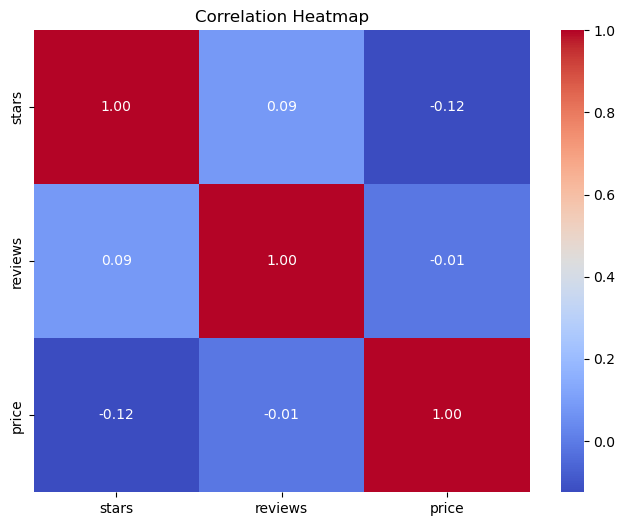

In [70]:

#Use a correlation heatmap to visualize correlations between all numerical variables.
# Compute correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'uid' and other non-informative numerical columns before computing correlation
df_numeric = df.drop(columns=['uid','isBestSeller','boughtInLastMonth'], errors='ignore')  # 'errors=ignore' prevents crash if 'uid' not present

# Select only numerical columns
df_numeric = df_numeric.select_dtypes(include='number')

# Compute correlation
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



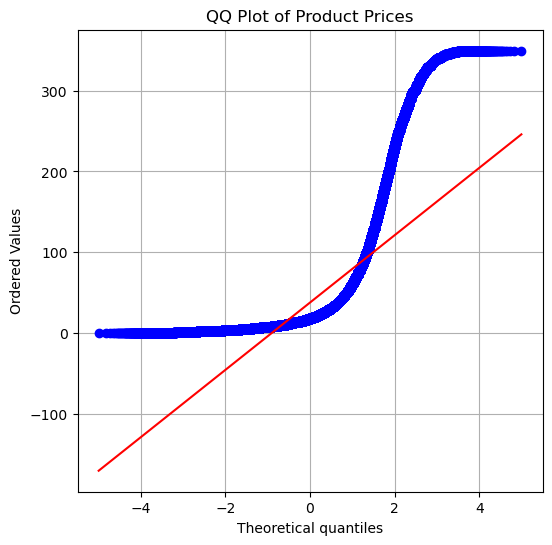

In [56]:
#Examine if product prices typically follow a normal distribution using a QQ plot.
# Drop outliers for better visualization
df_filtered = df[df['price'] < df['price'].quantile(0.95)]

# QQ plot
plt.figure(figsize=(6, 6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.grid(True)
plt.show()
#Since the points are not on the line,data is not normally distributd.Deviations especially in tails indicates skewness.